# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

pd.set_option('display.max_columns', None)

In [2]:


def explain(sl, moves, update_f=None):
    
    n = len(moves)+1
    
    fig, axes = plt.subplots(n,1, figsize=(20,n*2.5))
    axes = np.ravel(axes)
    axi = 0

    for move in moves:
        s = sl.rmove(move, update=True if update_f is None else False )
        plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
        display(sl.params); 
        print('---')
        if update_f:
            update_f(sl, s)
            
    plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
    display(sl.params); 
    print('---')

In [3]:
def run(joints, moves):
    sl = SegmentList(joints)
    
    for move in moves:
        sl.rmove(move)
        
    return sl

x = 1000 + 1
sl = run([Joint(5_000, 50_000)],( [x], [-x], [x], [x/2], [x],[x] ))
plot_segment_list(sl.dataframe)
sl

0.3002|[0        250↗   501@5000  ↘250        0] 0.0
0.3002|[0       -250↗  -501@5000  ↘-250       0] 0.0
0.2502|[0        250↗   751@5000  ↘0       5000] 0.0
0.1001|[5000       0↗   500@5000  ↘0       5000] 0.0
0.2002|[5000       0↗  1001@5000  ↘0       5000] 0.0
0.2502|[5000       0↗   751@5000  ↘250        0] 0.0

In [4]:
x = 3000
sl = run([Joint(5_000, 50_000),Joint(5_000, 50_000)],( [x,x], [-x,x], [x,x], [x/2,x], [x,x],[x,x] ))
plot_segment_list(sl.dataframe)

for s in sl:
    print([js.t for js in s])
    

sl

[0.7, 0.65]
[0.7, 0.6]
[0.65, 0.6]
[0.3, 0.6]
[0.6, 0.6]
[0.65, 0.65]


0.7000|[0        250↗  2500@5000  ↘250        0] [0        250↗  2750@5000  ↘0       5000] 0.0
0.7000|[0       -250↗ -2500@5000  ↘-250       0] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6500|[0        250↗  2750@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6000|[5000       0↗  1500@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6000|[5000       0↗  3000@5000  ↘0       5000] [5000       0↗  3000@5000  ↘0       5000] 0.0
0.6500|[5000       0↗  2750@5000  ↘250        0] [5000       0↗  2750@5000  ↘250        0] 0.0

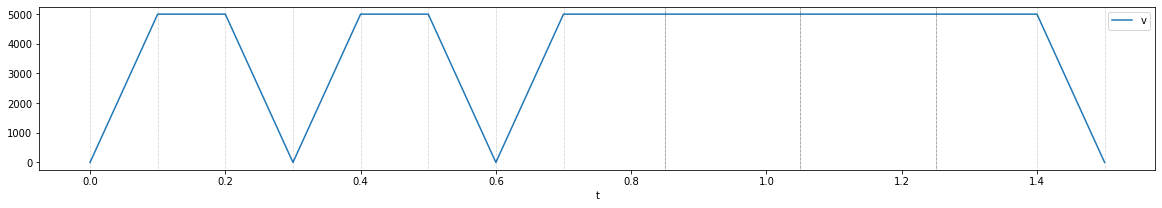

In [5]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])
x = 1000

sl.rmove([x])
sl.rmove([-x])
sl.rmove([x])
sl.rmove([1000])
sl.rmove([x])
sl.rmove([x])

plot_segment_list(sl.dataframe)


In [52]:
class TestSL(SegmentList):
    ...

sl = TestSL([Joint(5_000, 50_000)])

sl.rmove([100])
sl.rmove([-200])
sl.rmove([500])
sl.rmove([-750])
sl.rmove([1000])
sl.rmove([-1500])

plot_segment_list(sl.dataframe)

        

In [51]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])
x = 1000+10

sl.rmove([x,x])
sl.rmove([0,x])
sl.rmove([x,x])

for s in sl: 
    if s.prior_seg:
        print([ (a.v_0,self.v_1) for a, self in zip(s.prior_seg, s) ])

plot_segment_list(sl.dataframe)

display(sl.dataframe)

[(0, 0), (0, 4009.1380622302268)]
[(0, 0), (3829.926220287734, 0)]


/Users/eric/Documents/proj/trajectory/trajectory/planner.py:949: UserWarning: Failed to converge 13.690726499701555
  return True


,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.100000,0,0,250.0,0.000000,0.00,5000.00,0.0,a,0.100000,250.000000,0.000000e+00
1,0.202000,0,0,510.0,0.000000,5000.00,5000.00,0.0,c,0.102000,510.000000,5.684342e-14
2,0.302000,0,0,250.0,0.000000,5000.00,0.00,0.0,d,0.100000,250.000000,0.000000e+00
3,0.075247,0,1,142.0,0.000000,0.00,3829.93,5000.0,a,0.075247,144.096329,-2.096329e+00
4,0.302000,0,1,868.0,0.000000,3829.93,3829.93,5000.0,c,0.226752,868.446202,-4.462023e-01
5,0.302000,0,1,0.0,0.000000,3829.93,3829.93,5000.0,d,0.000000,0.000000,0.000000e+00
6,0.302000,1,0,0.0,0.000000,0.00,0.00,0.0,a,0.000000,0.000000,0.000000e+00
7,0.554000,1,0,0.0,0.000000,0.00,0.00,0.0,c,0.252000,0.000000,0.000000e+00
8,0.554000,1,0,0.0,0.000000,0.00,0.00,0.0,d,0.000000,0.000000,0.000000e+00
9,0.304727,1,1,11.0,3829.926220,3829.93,4009.14,5000.0,a,0.002727,10.688180,3.118200e-01


In [95]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([500,x]);
#sl.rmove([x,x]);
#sl.rmove([0,x]);
#sl.rmove([x,x]);

plot_segment_list(sl.dataframe); plt.show()
display(sl.dataframe.groupby(['seg','axis']).del_t.sum().unstack())
sl.dataframe

!!! 5000 0.65 0.65
!!! 4586.187214611873 0.65 0.65


axis,0,1
seg,,
0,0.70,0.70
1,0.65,0.65


,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.091667,0,0,210.0,0.000000,0.00,4586.19,5000,a,0.091667,210.200451,-0.200451
1,0.700000,0,0,2790.0,0.000000,4586.19,4586.19,5000,c,0.608333,2789.932097,0.067903
2,0.700000,0,0,0.0,0.000000,4586.19,4586.19,5000,d,0.000000,0.000000,0.000000
3,0.091667,0,1,210.0,0.000000,0.00,4586.19,5000,a,0.091667,210.200451,-0.200451
4,0.700000,0,1,2790.0,0.000000,4586.19,4586.19,5000,c,0.608333,2789.932097,0.067903
5,0.700000,0,1,0.0,0.000000,4586.19,4586.19,5000,d,0.000000,0.000000,0.000000
6,0.781346,1,0,208.0,4586.187215,4586.19,518.86,0,a,0.081347,207.638975,0.361025
7,1.339623,1,0,290.0,4586.187215,518.86,518.86,0,c,0.558276,289.667241,0.332759
8,1.350000,1,0,3.0,4586.187215,518.86,0.00,0,d,0.010377,2.692183,0.307817
9,0.708276,1,1,40.0,4586.187215,4586.19,5000.00,0,a,0.008276,39.669092,0.330908


In [114]:
sl[1,0].__dict__

{'joint': <trajectory.planner.Joint at 0x7fddea77d760>,
 'segment': <trajectory.planner.Segment at 0x7fdd880a1700>,
 'x': 200,
 'dir': 1,
 'init_v0': 0,
 'next_js': None,
 'prior_js': [0        209↗  2780@4586  ↘9       4472],
 'needs_update_boundaries': False,
 'needs_recalc': False,
 'v_0_max': 4472.13595499958,
 'v_1_max': 0.0,
 'v_c_max': 5000,
 'x_a': 200.0,
 't_a': 0.08944271909999159,
 'x_d': 0.0,
 't_d': 0.0,
 'v_0': 4472.13595499958,
 'v_c': 0,
 'x_c': 0,
 't_c': 0,
 'v_1': 0.0,
 't': 0.08944271909999159}

Break:  True
Break:  True
Break:  True
Break:  True
Break:  True
Break:  True
Break:  True
Break:  True
Break:  True
Break:  True


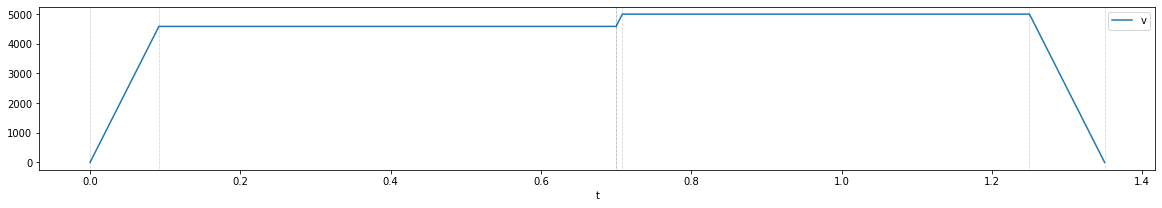

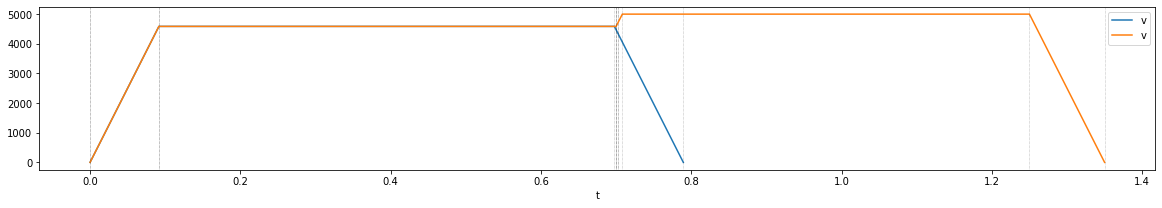

axis,0,1
seg,,
0,0.700000,0.70
1,0.089443,0.65


,t,seg,axis,x,v0m,v_i,v_f,v1m,ss,del_t,calc_x,err
0,0.091612,0,0,210.0,0.000000,0.00,4586.40,4472.135955,a,0.091612,210.084638,-0.084638
1,0.697831,0,0,2780.0,0.000000,4586.40,4586.40,4472.135955,c,0.606219,2780.361904,-0.361904
2,0.700000,0,0,10.0,0.000000,4586.40,4472.14,4472.135955,d,0.002169,9.824892,0.175108
3,0.091608,0,1,210.0,0.000000,0.00,4586.19,4586.187215,a,0.091608,210.065847,-0.065847
4,0.700000,0,1,2790.0,0.000000,4586.19,4586.19,4586.187215,c,0.608392,2790.201306,-0.201306
5,0.700000,0,1,0.0,0.000000,4586.19,4586.19,4586.187215,d,0.000000,0.000000,0.000000
6,0.703048,1,0,13.0,4472.135955,4472.14,4319.75,0.000000,a,0.003048,13.397522,-0.397522
7,0.703048,1,0,0.0,4472.135955,4319.75,4319.75,0.000000,c,0.000000,0.000000,0.000000
8,0.789443,1,0,187.0,4472.135955,4319.75,0.00,0.000000,d,0.086395,186.602401,0.397599
9,0.708276,1,1,40.0,4586.187215,4586.19,5000.00,0.000000,a,0.008276,39.669092,0.330908


In [115]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([200,x]);
#sl.rmove([x,x]);
#sl.rmove([0,x]);
#sl.rmove([x,x]);

df = sl.dataframe
plot_segment_list(df[df.axis==1]); plt.show()
plot_segment_list(df); plt.show()
display(df.groupby(['seg','axis']).del_t.sum().unstack())
df

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 501

sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 499


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
sl = SegmentList([Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(5,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)
